# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import model_selection, datasets, linear_model, metrics

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [5]:
data, target, coef = datasets.make_regression(n_features=2, n_informative=1, n_targets=1, 
                                              noise=5., coef=True, random_state=2)

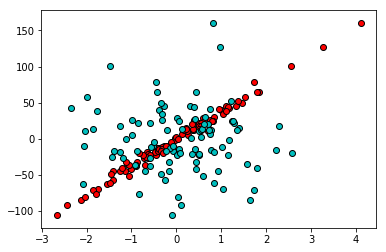

In [12]:
pylab.scatter(data[:,0], target, color='r', edgecolor='black')
pylab.scatter(data[:,1], target, color='c', edgecolor='black')

In [13]:
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(data, target,  
                                                                                     test_size=0.3)

#### LinearRegression

In [14]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [15]:
test_labels

array([ 20.87713077, -63.4056294 , -40.84204295,  44.41658249,
         4.45578287, -52.37232463,  44.66274342,  21.20540389,
       -10.27758354, -10.06708677, -32.71074998, -36.69728864,
       -16.85466265,  11.74073026,  45.05465366,  24.47584129,
       -12.98848753, -22.32195021,  25.7124082 ,  51.87072011,
        41.1068411 ,  24.82763821, -22.64686884, -42.44469577,
       -36.44717565,  12.74038341,  12.42286854, -26.87743177,
       -44.51417742, -19.16792315])

In [17]:
predictions

array([ 13.3667901 , -60.76855973, -46.77481064,  44.04086547,
         8.80310357, -41.09071543,  50.68170427,  16.47516899,
        -7.94266846, -10.21000948, -43.92639625, -27.79787361,
       -16.67653071,  14.0893546 ,  42.10909267,  22.81243241,
       -16.77746071, -22.96400834,  27.79643298,  52.25453525,
        36.48958744,  30.49067797, -17.86277664, -39.64296088,
       -41.56938319,   6.91120794,   6.48680942, -28.4548787 ,
       -55.20238735, -11.29459444])

In [18]:
metrics.mean_absolute_error(test_labels, predictions)

4.478468844622396

In [28]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring='neg_mean_absolute_error', 
                                                  cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: -4.070071498779696, std: 1.07371044928902


In [25]:
scorer=metrics.make_scorer(metrics.mean_absolute_error, greater_is_better=True)

In [27]:
linear_scoring = model_selection.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv=10)
print('mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std()))

mean: 4.070071498779696, std: 1.07371044928902


In [29]:
coef

array([38.07925837,  0.        ])

In [30]:
linear_regressor.coef_

array([38.34375394,  0.39170758])

In [32]:
# в лекции не указано, что в уравнении обученной модели также участвует свободный член
linear_regressor.intercept_

-0.6474584600403062

In [33]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [34]:
print("y = {:.2f}*x1 + {:.2f}*x2 + {:.2f}".format(linear_regressor.coef_[0], 
                                                  linear_regressor.coef_[1], 
                                                  linear_regressor.intercept_))

y = 38.34*x1 + 0.39*x2 + -0.65


#### Lasso

In [37]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [38]:
lasso_scoring = model_selection.cross_val_score(lasso_regressor, data, target, scoring=scorer, cv=10)
print('mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std()))

mean: 4.1544782466663985, std: 1.0170354384993352


In [39]:
lasso_regressor.coef_

array([37.63722223,  0.        ])

In [40]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1]))

y = 38.08*x1 + 0.00*x2


In [41]:
print("y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1]))

y = 37.64*x1 + 0.00*x2
